# Context
This dataset contains 15,977 survey responses with 24 attributes describing how we live our lives.
How can we reinvent our lifestyles to optimize our individual wellbeing while supporting the UN Sustainable Development Goals?

Your Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:
1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.

The Work-Life Balance Score is the total of all five categories: a  poor score is below 550,  a good score is above 680, an excellent score is above 700


Link dataset: https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data/code

Reference: 

https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

https://github.com/taufiqbashori/wellbeing-regression/blob/main/Work_Life_Balance_MultiRegression%20(1).ipynb

https://www.kaggle.com/code/ydalat/work-life-balance-survey-eda#1.-Data-Import-and-Preparation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option("display.max_column",None)

In [2]:
data = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [4]:
df = data.copy()

In [5]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9


DAILY_STRESS is numeric but it is in object data type

=> NEED TO TRANSFER IT INTO NUMERIC

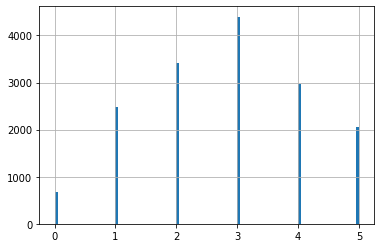

In [6]:
# using to_numeric with errors = coerce to transfer non-numeric into nan
df.DAILY_STRESS = pd.to_numeric(df.DAILY_STRESS,errors="coerce")

#Check null or not
df.DAILY_STRESS.isnull().sum()

#Check distribution of feature
df.DAILY_STRESS.hist(bins=100)

#fill with median
df.DAILY_STRESS.fillna(df.DAILY_STRESS.median(), inplace=True)

In [7]:
df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,2.791698,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,1.367759,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


# EDA

## Check distribution

array([[<AxesSubplot:title={'center':'FRUITS_VEGGIES'}>,
        <AxesSubplot:title={'center':'DAILY_STRESS'}>,
        <AxesSubplot:title={'center':'PLACES_VISITED'}>,
        <AxesSubplot:title={'center':'CORE_CIRCLE'}>,
        <AxesSubplot:title={'center':'SUPPORTING_OTHERS'}>],
       [<AxesSubplot:title={'center':'SOCIAL_NETWORK'}>,
        <AxesSubplot:title={'center':'ACHIEVEMENT'}>,
        <AxesSubplot:title={'center':'DONATION'}>,
        <AxesSubplot:title={'center':'BMI_RANGE'}>,
        <AxesSubplot:title={'center':'TODO_COMPLETED'}>],
       [<AxesSubplot:title={'center':'FLOW'}>,
        <AxesSubplot:title={'center':'DAILY_STEPS'}>,
        <AxesSubplot:title={'center':'LIVE_VISION'}>,
        <AxesSubplot:title={'center':'SLEEP_HOURS'}>,
        <AxesSubplot:title={'center':'LOST_VACATION'}>],
       [<AxesSubplot:title={'center':'DAILY_SHOUTING'}>,
        <AxesSubplot:title={'center':'SUFFICIENT_INCOME'}>,
        <AxesSubplot:title={'center':'PERSONAL_AWARDS'}>,
   

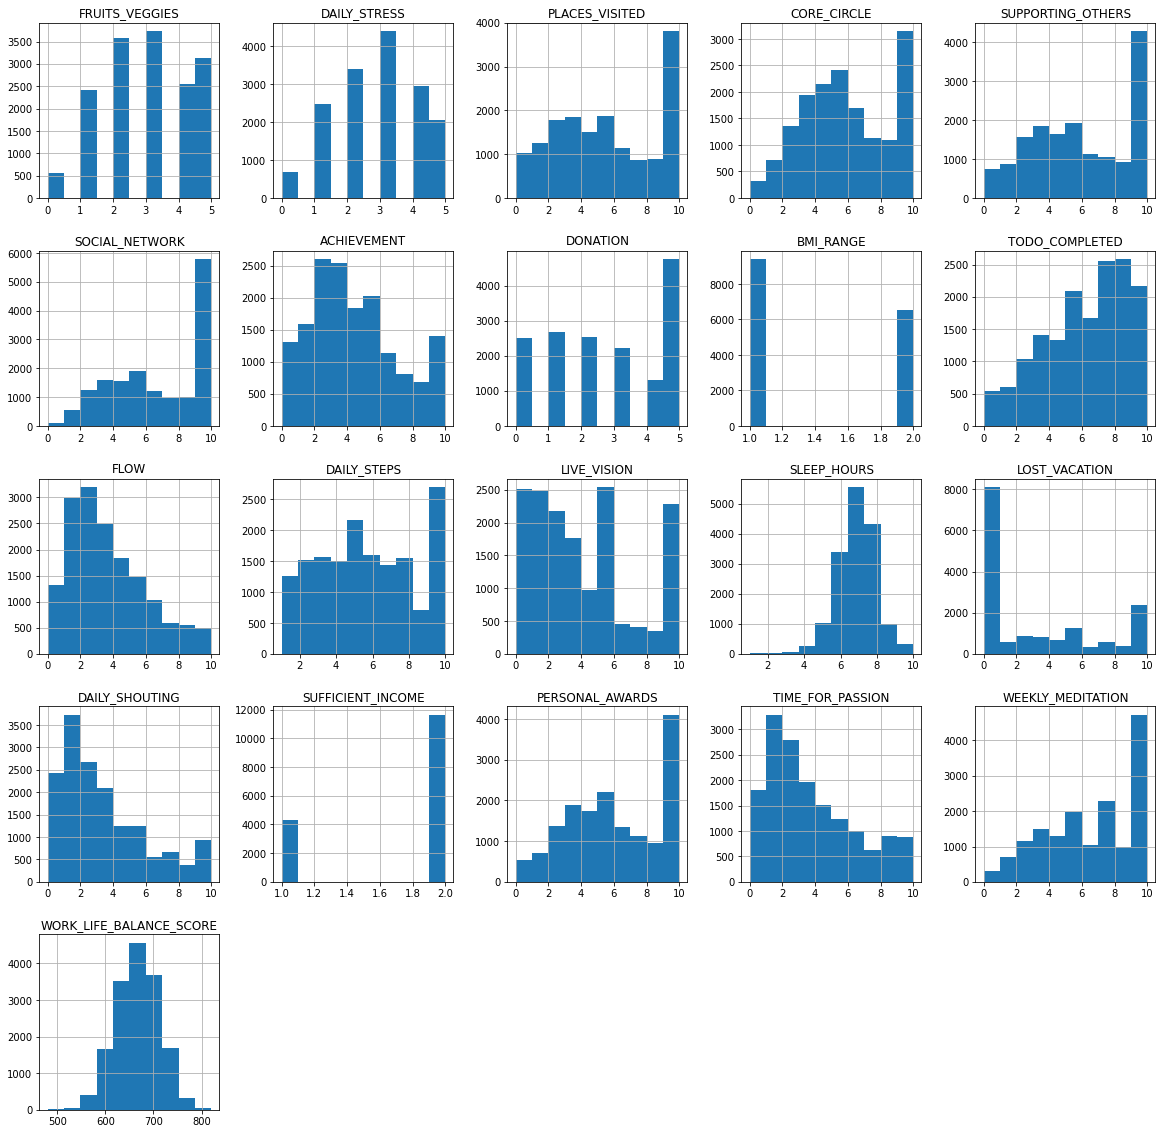

In [8]:
df.hist(figsize=(20,20))

__Most of features are not normal distrbuted. There are 2 binary distribution: sufficient income and BMI_range__

## Categorical exploration

<AxesSubplot:xlabel='GENDER'>

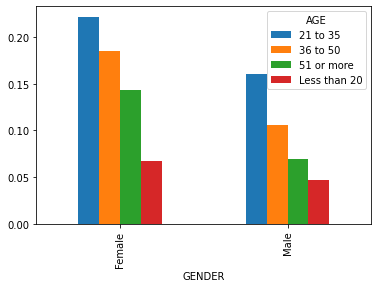

In [9]:
# Gender and Age
pd.crosstab(df.GENDER,df.AGE, normalize=True).plot(kind="bar")

Seems like most people are from 21 to 50 anticipated in the survey. More female than male

Again, rate of female is higher than male. It's also because of higher number of female anticipating

<AxesSubplot:xlabel='GENDER'>

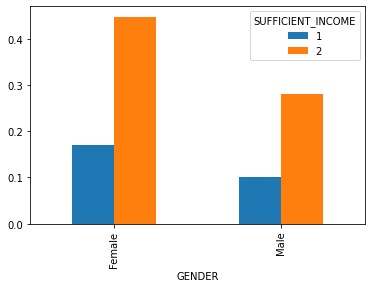

In [10]:
# Sufficient and gender
## Sufficient means: HOW SUFFICIENT IS YOUR INCOME TO COVER BASIC LIFE EXPENSES
pd.crosstab(df.GENDER,df.SUFFICIENT_INCOME, normalize=True).plot(kind="bar")

### Physical Health

<AxesSubplot:xlabel='GENDER'>

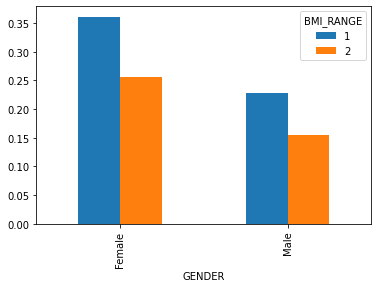

In [11]:
# BMI and gender
pd.crosstab(df.GENDER,df.BMI_RANGE, normalize=True).plot(kind="bar")

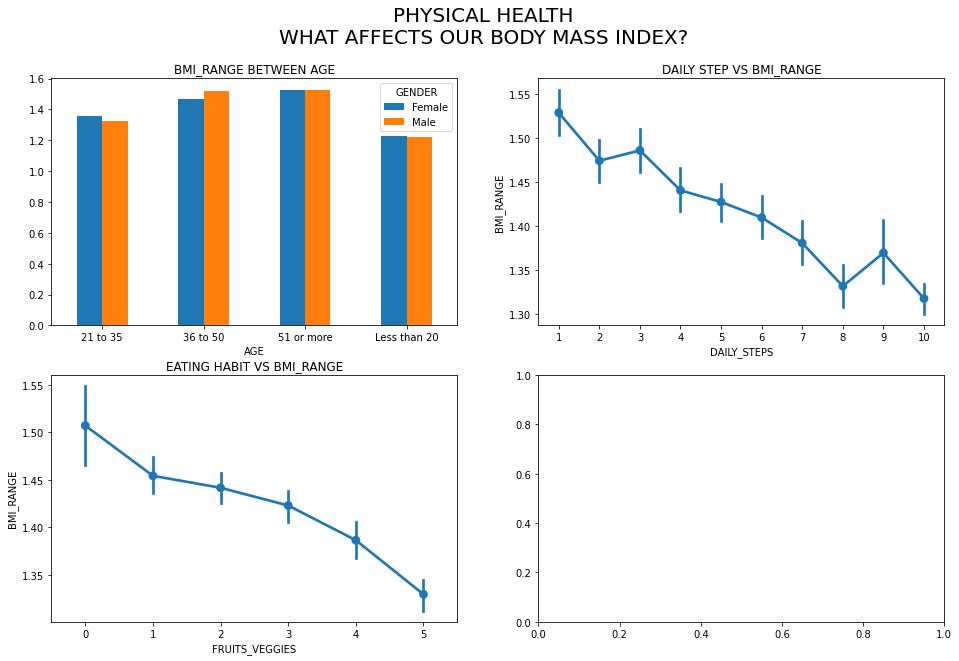

In [12]:
df2 = df.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'], )
df2.head()

# Physical health
f,ax = plt.subplots(2,2,figsize=(16,10))
ax[0,0].set_title('BMI_RANGE BETWEEN AGE')
ax[0,1].set_title('DAILY STEP VS BMI_RANGE')
ax[1,0].set_title('EATING HABIT VS BMI_RANGE')

# ax[0,0].set_ylim([3.5, 4.5])
df2.plot(kind='bar', ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'DAILY_STEPS',  y = 'BMI_RANGE',  data=df, ax = ax[0,1])
sns.pointplot(x = 'FRUITS_VEGGIES',  y = 'BMI_RANGE',  data=df, ax = ax[1,0])

f.suptitle('PHYSICAL HEALTH\nWHAT AFFECTS OUR BODY MASS INDEX?', fontsize=20)
plt.show()

### Healthy mind, indicating how well you embrace positive emotions

'Flow' is defined as the mental state, in which you are fully immersed in performing an activity.

In [13]:
df.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2.0,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3.0,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6


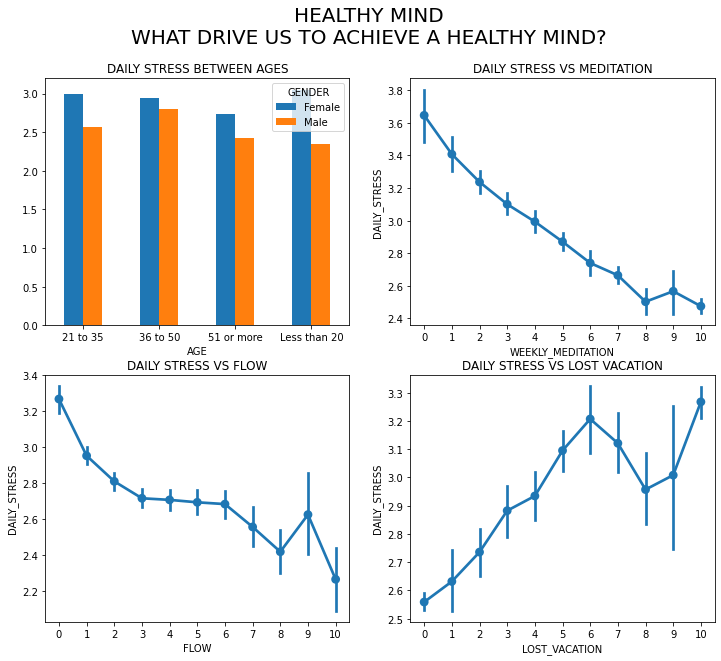

In [14]:
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

# Daily stress
f,ax = plt.subplots(2,2,figsize=(12,10))
ax[0,0].set_title('DAILY STRESS BETWEEN AGES')
ax[0,1].set_title('DAILY STRESS VS MEDITATION')
ax[1,0].set_title('DAILY STRESS VS FLOW')
ax[1,1].set_title('DAILY STRESS VS LOST VACATION')


df3.plot(kind='bar', ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'WEEKLY_MEDITATION',  y = 'DAILY_STRESS',  data=df, ax = ax[0,1])
sns.pointplot(x = 'FLOW',  y = 'DAILY_STRESS',  data=df, ax = ax[1,0])
sns.pointplot(x = 'LOST_VACATION',  y = 'DAILY_STRESS',  data=df, ax = ax[1,1])


f.suptitle('HEALTHY MIND\nWHAT DRIVE US TO ACHIEVE A HEALTHY MIND?', fontsize=20)
plt.show()

### Expertise, measuring the ability to grow your expertise and achieve something unique

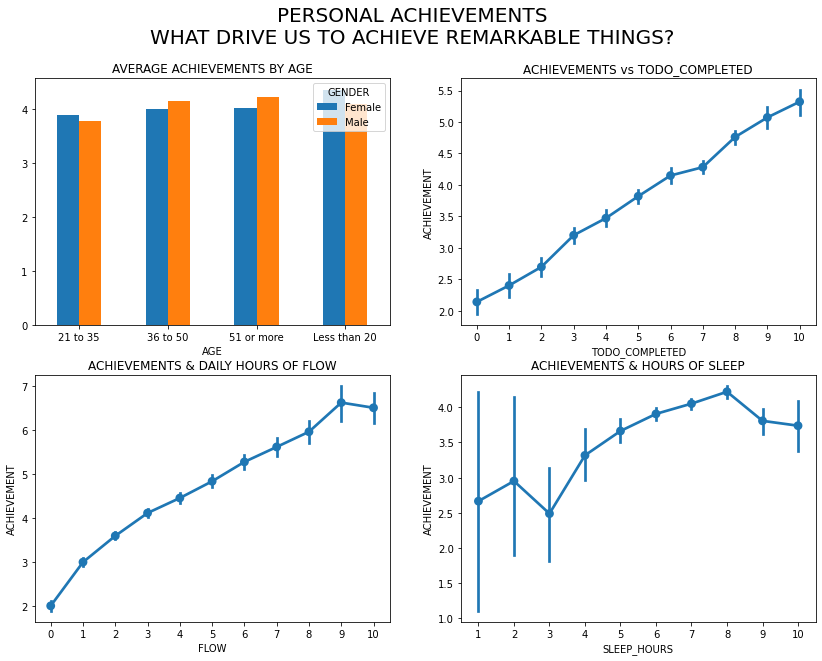

In [15]:
df4 = df.pivot_table(values='ACHIEVEMENT', index=['AGE'], columns=['GENDER'], )
df4.head()

# EXPERTISE
f,ax = plt.subplots(2,2,figsize=(14,10))
ax[0,0].set_title('AVERAGE ACHIEVEMENTS BY AGE')
ax[0,1].set_title('ACHIEVEMENTS vs TODO_COMPLETED')
ax[1,0].set_title('ACHIEVEMENTS & DAILY HOURS OF FLOW')
ax[1,1].set_title('ACHIEVEMENTS & HOURS OF SLEEP')





df4.plot(kind='bar', ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'TODO_COMPLETED',  y = 'ACHIEVEMENT',  data=df, ax = ax[0,1])
sns.pointplot(x = 'FLOW',  y = 'ACHIEVEMENT',  data=df, ax = ax[1,0])
sns.pointplot(x = 'SLEEP_HOURS', y = 'ACHIEVEMENT',  data=df, ax = ax[1,1])


f.suptitle('PERSONAL ACHIEVEMENTS\nWHAT DRIVE US TO ACHIEVE REMARKABLE THINGS?', fontsize=20)
plt.show()

### CONNECTIONS

Core_circle bs places, lost vacation, friends, gender, age, daily_stress, social network

In [16]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2.0,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3.0,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3.0,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3.0,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1.0,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9


Core_circle: HOW MANY PEOPLE ARE VERY CLOSE TO YOU?

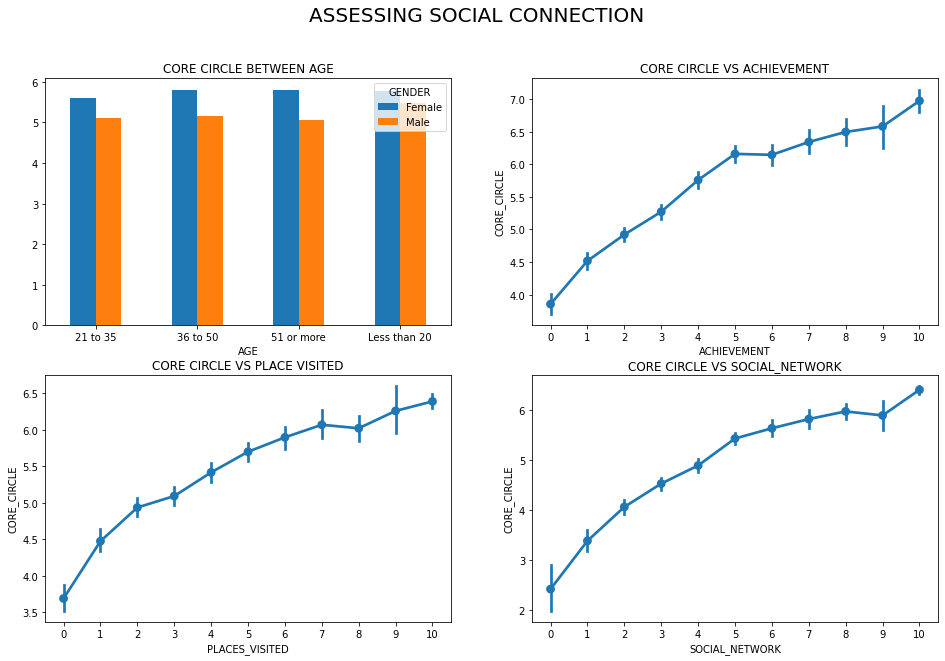

In [17]:
df5 = df.pivot_table(values='CORE_CIRCLE', index=['AGE'], columns=['GENDER'])

# Connection
f,ax = plt.subplots(2,2,figsize=(16,10))
ax[0,0].set_title('CORE CIRCLE BETWEEN AGE')
ax[0,1].set_title('CORE CIRCLE VS ACHIEVEMENT')
ax[1,0].set_title('CORE CIRCLE VS PLACE VISITED')
ax[1,1].set_title('CORE CIRCLE VS SOCIAL_NETWORK')





df5.plot(kind='bar', ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'ACHIEVEMENT', y = 'CORE_CIRCLE',  data=df, ax = ax[0,1])
sns.pointplot(x = 'PLACES_VISITED', y = 'CORE_CIRCLE',  data=df, ax = ax[1,0])
sns.pointplot(x = 'SOCIAL_NETWORK', y = 'CORE_CIRCLE',  data=df, ax = ax[1,1])



f.suptitle('ASSESSING SOCIAL CONNECTION', fontsize=20)
plt.show()

add with supporting others, donationa

### PASSION

In [18]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2.0,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3.0,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3.0,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3.0,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1.0,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9


TIME_FOR PASSION vs gender, age, TODO_COMPLETED, FLOW, PERSONAL AWARD, live_vision,

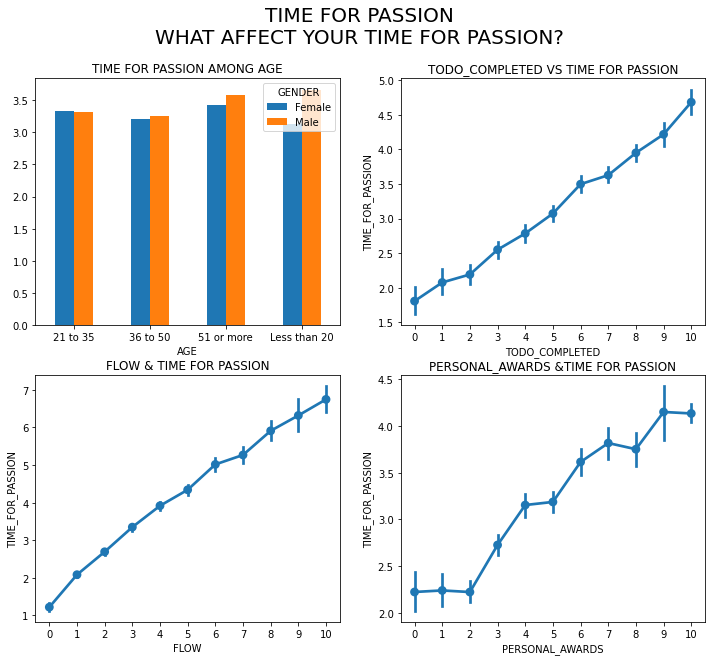

In [19]:
df6 = df.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

# EXPERTISE
f,ax = plt.subplots(2,2,figsize=(12,10))
ax[0,0].set_title('TIME FOR PASSION AMONG AGE')
ax[0,1].set_title('TODO_COMPLETED VS TIME FOR PASSION')
ax[1,0].set_title('FLOW & TIME FOR PASSION')
ax[1,1].set_title('PERSONAL_AWARDS &TIME FOR PASSION')



df6.plot(kind='bar', ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'TODO_COMPLETED',  y = 'TIME_FOR_PASSION',  data=df,  ax = ax[0,1])
sns.pointplot(x = 'FLOW',  y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,0])
sns.pointplot(x = 'PERSONAL_AWARDS', y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,1])

f.suptitle('TIME FOR PASSION\nWHAT AFFECT YOUR TIME FOR PASSION?', fontsize=20)
plt.show()

# Feature Transformation & Selection

## Dummy variables encoding for categorical variables

### Replace values for easy understanding

In [20]:
df.BMI_RANGE.replace({1: "BMI < 25", 2: "BMI > 25"}, inplace=True)

In [21]:
df.SUFFICIENT_INCOME.replace({1: "Not or hardly sufficient", 2: "Sufficient"}, inplace=True)

### Get dummies categorical features

In [22]:
BMI = pd.get_dummies(df.BMI_RANGE,drop_first=True)
INCOME = pd.get_dummies(df.SUFFICIENT_INCOME,drop_first=True)
AGE = pd.get_dummies(df.AGE,drop_first=True)
GENDER = pd.get_dummies(df.GENDER,drop_first=True)

### DROP unessarry columns

In [23]:
df.drop(["Timestamp","GENDER","BMI_RANGE","SUFFICIENT_INCOME","AGE"],axis=1,inplace=True)

### CONCATENATE created features

In [24]:
df = pd.concat([df, BMI, INCOME, AGE, GENDER],axis=1)

In [25]:
df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,BMI > 25,Sufficient,36 to 50,51 or more,Less than 20,Male
0,3,2.0,2,5,0,5,2,0,6,4,5,0,7,5,5,4,0,5,609.5,0,0,1,0,0,0
1,2,3.0,4,3,8,10,5,2,5,2,5,5,8,2,2,3,2,6,655.6,1,1,1,0,0,0
2,2,3.0,3,4,4,10,3,2,2,2,4,5,8,10,2,4,8,3,631.6,1,1,1,0,0,0
3,3,3.0,10,3,10,7,2,5,3,5,5,0,5,7,5,5,2,0,622.7,1,0,0,1,0,0
4,5,1.0,3,3,10,4,2,4,5,0,5,0,7,0,0,8,1,5,663.9,1,1,0,1,0,0


## Skewness transformation

### Check skewness 

In [26]:
skewness_dict = {}
for column in df.columns:
    if df[column].dtypes == "int64" or df[column].dtypes == "float64":
        skewness_dict[column] = df[column].skew()
    else:
        continue

In [27]:
## Sort based on absolute value because which values above 0.25 are considered highly skewed
skewness = sorted(skewness_dict.items(),key=lambda element: abs(element[1]), reverse=True)

Text(0, 0.5, 'Skewness')

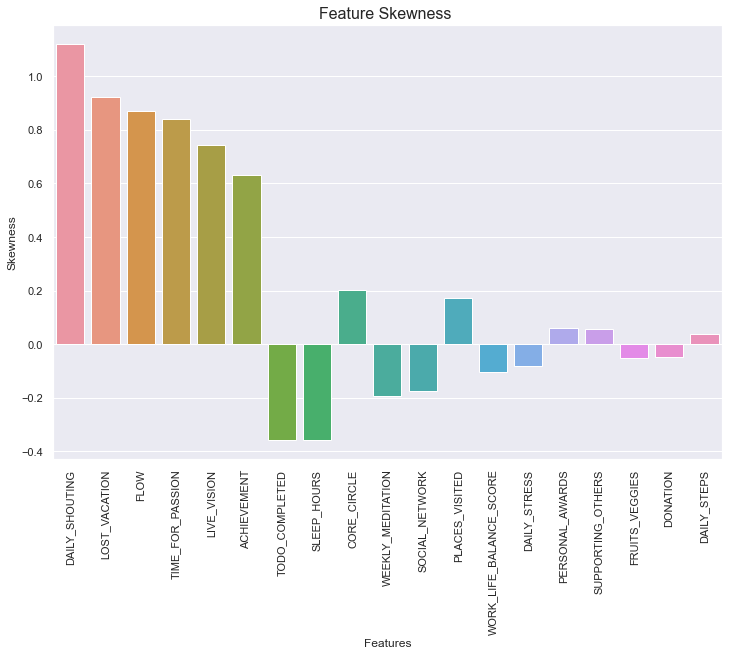

In [28]:
sns.set(rc={'figure.figsize': (12,8)})

#assign x and y for barplot
x_1 = []
for row in skewness:
    value = row[0]
    x_1.append(value)

y_1 = []
for row in skewness:
    value = row[1]
    y_1.append(value)

#plot 
plot = sns.barplot(x=x_1, y=y_1)
for item in plot.get_xticklabels():
    item.set_rotation(90)

plot.set_title("Feature Skewness ", fontsize = 16)
plot.set_xlabel("Features", fontsize = 12)
plot.set_ylabel("Skewness", fontsize = 12)

### Transform skewness data using yeo-johnson

In [29]:
from scipy import stats
from scipy.stats import yeojohnson
transformed_skew = {}
parameters_skew = {}
for col in x_1[:8]:
    transformed_skew[col + "_transformed"], parameters = stats.yeojohnson(df[col])
    parameters_skew[col+"_transformed"] = parameters

transformed_df = pd.DataFrame(transformed_skew)
transformed_df.head()

,DAILY_SHOUTING_transformed,LOST_VACATION_transformed,FLOW_transformed,TIME_FOR_PASSION_transformed,LIVE_VISION_transformed,ACHIEVEMENT_transformed,TODO_COMPLETED_transformed,SLEEP_HOURS_transformed
0,1.868211,1.253469,1.979437,0.000000,0.000000,1.388189,7.455288,16.725277
1,1.127045,0.877468,1.263460,1.206387,2.169449,2.646930,6.085727,20.317733
2,1.127045,1.502612,1.263460,2.656967,2.169449,1.867557,2.233087,20.317733
3,1.868211,1.379739,2.257834,1.206387,0.000000,1.388189,3.466884,10.331872
4,0.000000,-0.000000,0.000000,0.735063,0.000000,1.388189,6.085727,16.725277


### Re-check skewness

In [30]:
skewness_dict_transformed = {}
for column in transformed_df.columns:
        skewness_dict_transformed[column] = transformed_df[column].skew()

In [31]:
## Sort based on absolute value because which values above 0.25 are considered highly skewed
skewness_transformed = sorted(skewness_dict_transformed.items(),key=lambda element: abs(element[1]), reverse=True)

Text(0, 0.5, 'Skewness')

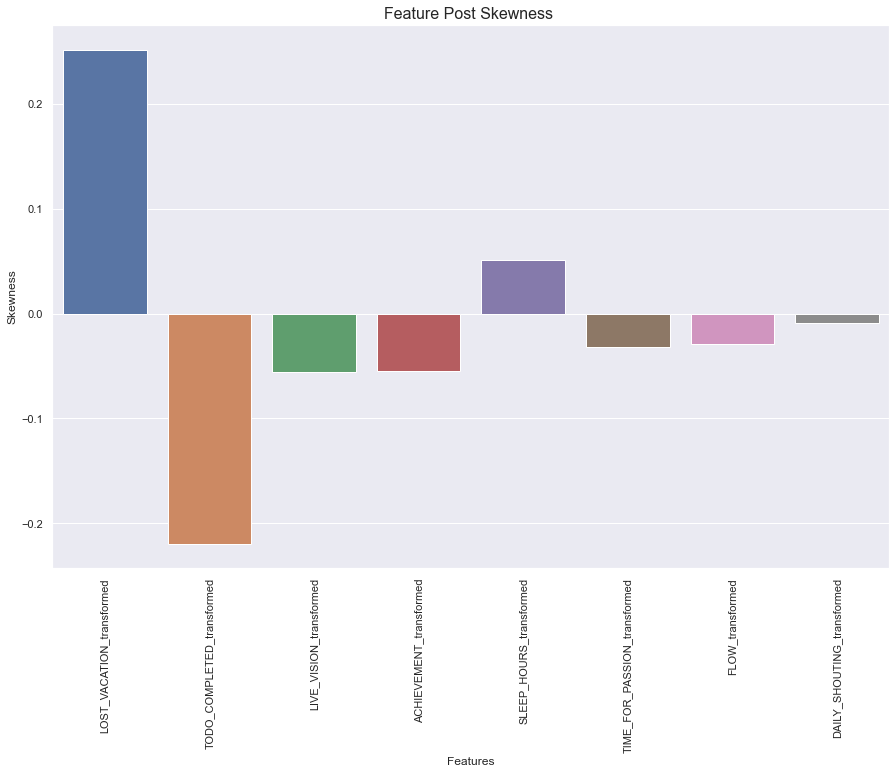

In [32]:
sns.set(rc={'figure.figsize': (15,10)})

#assign x and y for barplot
x_2 = []
for row in skewness_transformed:
    value = row[0]
    x_2.append(value)

y_2 = []
for row in skewness_transformed:
    value = row[1]
    y_2.append(value)

#plot 
plot = sns.barplot(x=x_2, y=y_2)
for item in plot.get_xticklabels():
    item.set_rotation(90)

plot.set_title("Feature Post Skewness ", fontsize = 16)
plot.set_xlabel("Features", fontsize = 12)
plot.set_ylabel("Skewness", fontsize = 12)

In [33]:
# skewed_df
skewed_df = pd.concat((df.drop(columns = [col for col in x_1[:8]]),transformed_df), axis=1)
skewed_df

#non_skew_df
df

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,BMI > 25,Sufficient,36 to 50,51 or more,Less than 20,Male
0,3,2.0,2,5,0,5,2,0,6,4,5,0,7,5,5,4,0,5,609.5,0,0,1,0,0,0
1,2,3.0,4,3,8,10,5,2,5,2,5,5,8,2,2,3,2,6,655.6,1,1,1,0,0,0
2,2,3.0,3,4,4,10,3,2,2,2,4,5,8,10,2,4,8,3,631.6,1,1,1,0,0,0
3,3,3.0,10,3,10,7,2,5,3,5,5,0,5,7,5,5,2,0,622.7,1,0,0,1,0,0
4,5,1.0,3,3,10,4,2,4,5,0,5,0,7,0,0,8,1,5,663.9,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3.0,0,4,0,10,0,4,8,2,10,7,7,0,1,5,2,5,644.5,1,0,0,1,0,0
15968,3,3.0,6,8,7,4,6,3,7,5,6,5,6,0,0,10,5,8,714.9,0,1,0,0,0,0
15969,4,3.0,0,10,10,8,6,5,7,3,5,2,7,0,1,10,1,10,716.6,0,1,0,0,0,1
15970,1,1.0,10,8,2,7,3,2,6,10,1,5,8,7,2,1,6,8,682.0,0,1,0,0,0,0


In [34]:
corr_df = pd.DataFrame(df.corr())
corr_skew_df = pd.DataFrame(skewed_df.corr())

In [35]:
corr_df["WORK_LIFE_BALANCE_SCORE"].sort_values()

DAILY_STRESS              -0.365394
DAILY_SHOUTING            -0.273153
LOST_VACATION             -0.266243
BMI > 25                  -0.251988
Male                      -0.039881
Less than 20              -0.021036
36 to 50                   0.007121
51 or more                 0.126378
SLEEP_HOURS                0.196395
Sufficient                 0.403561
SOCIAL_NETWORK             0.412586
WEEKLY_MEDITATION          0.416171
DAILY_STEPS                0.422981
FRUITS_VEGGIES             0.452255
DONATION                   0.458829
LIVE_VISION                0.471311
FLOW                       0.478199
PERSONAL_AWARDS            0.504224
CORE_CIRCLE                0.507541
TIME_FOR_PASSION           0.516967
PLACES_VISITED             0.529615
TODO_COMPLETED             0.545503
SUPPORTING_OTHERS          0.548851
ACHIEVEMENT                0.561244
WORK_LIFE_BALANCE_SCORE    1.000000
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

In [36]:
df.drop(['Male', 'Less than 20', '36 to 50','51 or more'], axis=1, inplace=True)

In [37]:
df

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,BMI > 25,Sufficient
0,3,2.0,2,5,0,5,2,0,6,4,5,0,7,5,5,4,0,5,609.5,0,0
1,2,3.0,4,3,8,10,5,2,5,2,5,5,8,2,2,3,2,6,655.6,1,1
2,2,3.0,3,4,4,10,3,2,2,2,4,5,8,10,2,4,8,3,631.6,1,1
3,3,3.0,10,3,10,7,2,5,3,5,5,0,5,7,5,5,2,0,622.7,1,0
4,5,1.0,3,3,10,4,2,4,5,0,5,0,7,0,0,8,1,5,663.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3.0,0,4,0,10,0,4,8,2,10,7,7,0,1,5,2,5,644.5,1,0
15968,3,3.0,6,8,7,4,6,3,7,5,6,5,6,0,0,10,5,8,714.9,0,1
15969,4,3.0,0,10,10,8,6,5,7,3,5,2,7,0,1,10,1,10,716.6,0,1
15970,1,1.0,10,8,2,7,3,2,6,10,1,5,8,7,2,1,6,8,682.0,0,1


In [38]:
corr_skew_df["WORK_LIFE_BALANCE_SCORE"].sort_values()

DAILY_STRESS                   -0.365394
LOST_VACATION_transformed      -0.260355
BMI > 25                       -0.251988
DAILY_SHOUTING_transformed     -0.248451
Male                           -0.039881
Less than 20                   -0.021036
36 to 50                        0.007121
51 or more                      0.126378
SLEEP_HOURS_transformed         0.184763
Sufficient                      0.403561
SOCIAL_NETWORK                  0.412586
WEEKLY_MEDITATION               0.416171
DAILY_STEPS                     0.422981
FRUITS_VEGGIES                  0.452255
DONATION                        0.458829
LIVE_VISION_transformed         0.492228
FLOW_transformed                0.492931
PERSONAL_AWARDS                 0.504224
CORE_CIRCLE                     0.507541
PLACES_VISITED                  0.529615
TIME_FOR_PASSION_transformed    0.539246
TODO_COMPLETED_transformed      0.543884
SUPPORTING_OTHERS               0.548851
ACHIEVEMENT_transformed         0.567689
WORK_LIFE_BALANC

In [39]:
skewed_df.drop(['Male', 'Less than 20', '36 to 50','51 or more'], axis=1, inplace=True)

# Train model

## Scaling numeric features

### Create X and Y for 2 datasets

In [40]:
x_1 = df.drop(columns = ["WORK_LIFE_BALANCE_SCORE"], axis=1)
y_1 = df.WORK_LIFE_BALANCE_SCORE

x_2 = skewed_df.drop(columns = ["WORK_LIFE_BALANCE_SCORE"], axis=1)
y_2 = skewed_df.WORK_LIFE_BALANCE_SCORE

In [41]:
# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [42]:
# our scaler
scaler = MinMaxScaler()

# fit the scaler to our data
numeric_x_1 = x_1.drop(columns = ['BMI > 25', 'Sufficient'],axis =1 )

scaled_numeric_x_1 = pd.DataFrame(scaler.fit_transform(numeric_x_1), columns = numeric_x_1.columns)

x_1 = pd.concat((scaled_numeric_x_1,x_1[['BMI > 25', 'Sufficient']]),axis=1)

In [43]:
# our scaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

# fit the scaler to our data
numeric_x_2 = x_2.drop(columns = ['BMI > 25', 'Sufficient'],axis =1 )

scaled_numeric_x_2 = pd.DataFrame(scaler.fit_transform(numeric_x_2), columns = numeric_x_2.columns)

x_2 = pd.concat((scaled_numeric_x_2,x_2[['BMI > 25', 'Sufficient']]),axis=1)

## Compare R2 of 2 dataset

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1,test_size=0.3)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.999997940145977


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2,test_size=0.25)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.993279951600148


## Check Multicollinearity by VIF

### Check Multicollinearity of orginal df

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
  
# the independent variables set
X = df.drop(columns = ["WORK_LIFE_BALANCE_SCORE"], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values(by='VIF', ascending = False)

,feature,VIF
12,SLEEP_HOURS,16.236758
8,TODO_COMPLETED,7.561101
5,SOCIAL_NETWORK,6.738723
3,CORE_CIRCLE,6.111815
0,FRUITS_VEGGIES,6.082286
17,WEEKLY_MEDITATION,6.063402
4,SUPPORTING_OTHERS,6.005727
15,PERSONAL_AWARDS,5.868743
10,DAILY_STEPS,5.583984
1,DAILY_STRESS,5.544703


### Check Multicollinearity of skewed df

In [47]:
# the independent variables set
X = skewed_df.drop(columns = ["WORK_LIFE_BALANCE_SCORE"], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values(by='VIF', ascending = False)

,feature,VIF
19,SLEEP_HOURS_transformed,11.930087
17,ACHIEVEMENT_transformed,7.165488
14,FLOW_transformed,6.938714
18,TODO_COMPLETED_transformed,6.798785
5,SOCIAL_NETWORK,6.766147
15,TIME_FOR_PASSION_transformed,6.174861
3,CORE_CIRCLE,6.109618
0,FRUITS_VEGGIES,6.052713
4,SUPPORTING_OTHERS,5.998823
9,WEEKLY_MEDITATION,5.975057


## Re-compare R2 after removing hight multicolinear

### Split x and y for 2 datasets

In [48]:
x_1 = df.drop(columns = ["WORK_LIFE_BALANCE_SCORE", "SLEEP_HOURS", "TODO_COMPLETED", 
                                    "SOCIAL_NETWORK", "FRUITS_VEGGIES","WEEKLY_MEDITATION",
                                    "SUPPORTING_OTHERS", "PERSONAL_AWARDS"], axis=1)
y_1 = df.WORK_LIFE_BALANCE_SCORE

x_2 = skewed_df.drop(columns = ["WORK_LIFE_BALANCE_SCORE", "SLEEP_HOURS_transformed", "ACHIEVEMENT_transformed", 
                                    "SOCIAL_NETWORK", "FLOW_transformed","TODO_COMPLETED_transformed",
                                    "FRUITS_VEGGIES", "TIME_FOR_PASSION_transformed", "WEEKLY_MEDITATION",
                                    "SUPPORTING_OTHERS"], axis=1)
y_2 = skewed_df.WORK_LIFE_BALANCE_SCORE

### Scaling orginal dataset

In [49]:
# our scaler
scaler = MinMaxScaler()

# fit the scaler to our data
numeric_x_1 = x_1.drop(columns = ['BMI > 25', 'Sufficient'],axis =1 )

scaled_numeric_x_1 = pd.DataFrame(scaler.fit_transform(numeric_x_1), columns = numeric_x_1.columns)

x_1 = pd.concat((scaled_numeric_x_1,x_1[['BMI > 25', 'Sufficient']]),axis=1)

### Scaling skewed dataset

In [50]:
# our scaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

# fit the scaler to our data
numeric_x_2 = x_2.drop(columns = ['BMI > 25', 'Sufficient'],axis =1 )

scaled_numeric_x_2 = pd.DataFrame(scaler.fit_transform(numeric_x_2), columns = numeric_x_2.columns)

x_2 = pd.concat((scaled_numeric_x_2,x_2[['BMI > 25', 'Sufficient']]),axis=1)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1,test_size=0.3)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9189886365802997


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2,test_size=0.25)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.8617247893396979


=> Decided to used original data without skewing

## Chech Multivariate Normality

In [53]:
residuals = y_train.values - y_pred
mean_residuals = np.mean(residuals)
mean_residuals

-1.219896376321437e-13

C:\Users\Tris\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


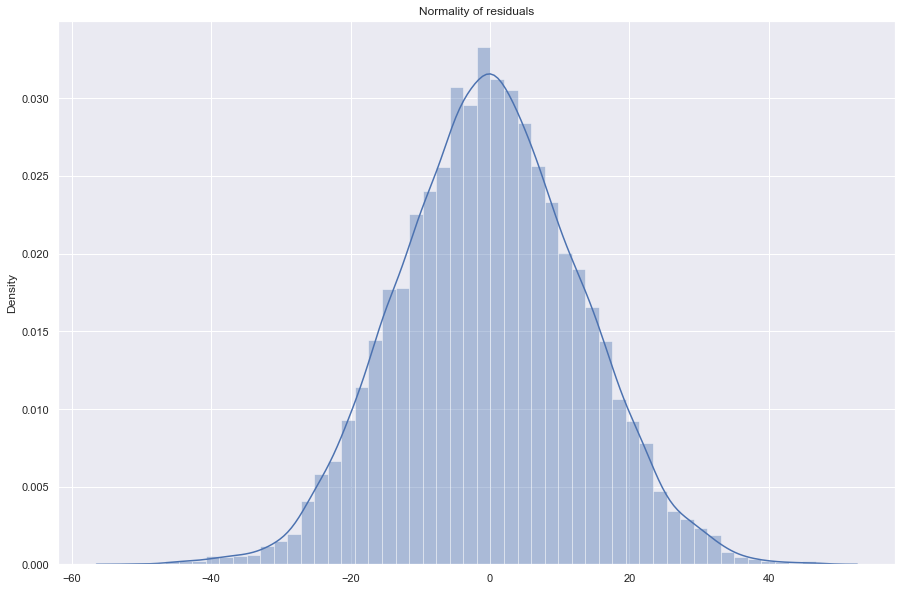

In [54]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of residuals')

__=> Residual distribution is normall distributed. It's good__

## Check Homoscedasticity

C:\Users\Tris\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tris\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


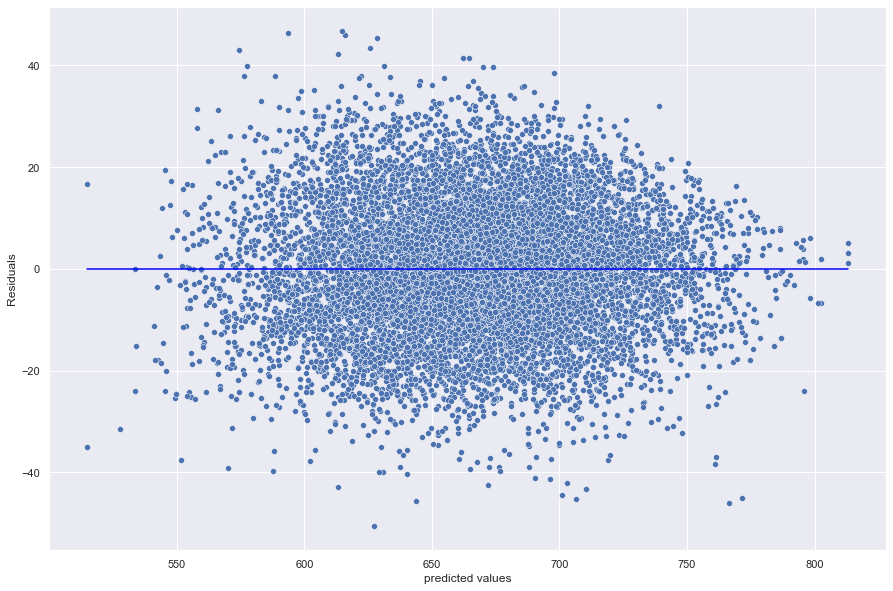

In [55]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')

__=> There is no clear pattern between residuals and predicted values. It's good__

### Check by Goldeld Quantdt test

H0: Error terms are homoscedastic 

H1: the Error terms are not homoscedastic 

In [56]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9529986545074906), ('p-value', 0.9638663468582989)]

__=> There is no sufficient evidence to reject the null. It's good__

# Applying model to test dataset

## Apply to test 

Text(0.5, 1.0, 'Model Trained R Squared =0.918')

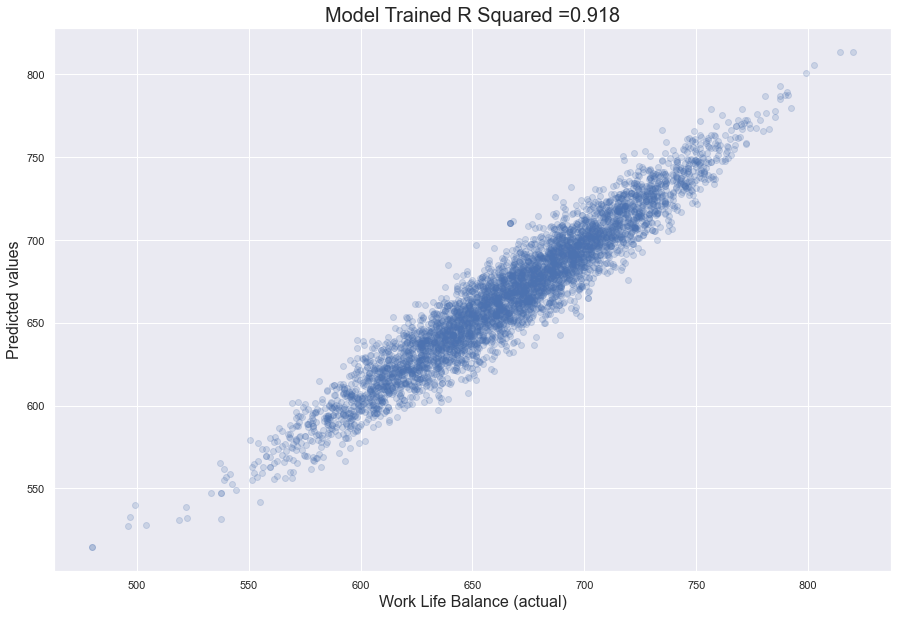

In [57]:
pred_y = regr.predict(X_test)

R2_test = regr.score(X_test,y_test) 
from matplotlib import pyplot as plt
plt.scatter(y_test, pred_y, alpha = 0.2)
plt.xlabel('Work Life Balance (actual)', size = 16)
plt.ylabel('Predicted values', size = 16)

plt.title('Model Trained R Squared ='+ '{number:.3f}'.format(number=R2_test), size = 20)

__=> Look good__

## Check residual

In [58]:
residual_df = pd.DataFrame(pred_y, columns = ['Predicted'])
y_test = y_test.reset_index (drop = True)
residual_df["Target"] = y_test
residual_df["Residual"] = residual_df["Target"] - residual_df["Predicted"]
residual_df["Residual%"] = abs((residual_df["Target"] - residual_df["Predicted"])/residual_df["Target"]*100)
residual_df.describe()

,Predicted,Target,Residual,Residual%
count,4792.000000,4792.000000,4792.000000,4792.000000
mean,666.869288,666.920889,0.051601,1.536024
std,42.689480,44.683455,12.809219,1.196942
min,514.956689,480.000000,-45.842832,0.000126
25%,637.780150,636.650000,-8.473000,0.604062
50%,667.439101,667.900000,-0.068208,1.285487
75%,696.586718,698.100000,8.684280,2.161333
max,813.264970,820.200000,46.103980,8.187325


__In worste case, max residual percentage is 8%. It means expecting standard deviation to be 8% different from actual values__

## Check feature weight: which features drive target variable the most ?

Text(0.5, 1.0, 'Feature Weights in Linear Regression')

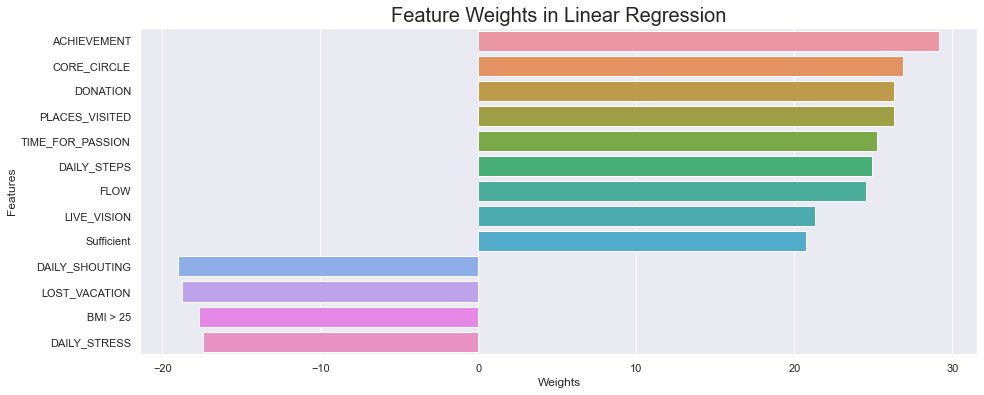

In [59]:
reg_summary = pd.DataFrame(x_1.columns.values, columns = ["Features"])
reg_summary["Weights"] = regr.coef_

# plot bar chart
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Weights", y="Features", data=reg_summary.sort_values("Weights", ascending=False, key = abs),
            label="Weights")
ax.set_title("Feature Weights in Linear Regression",fontsize=20)          